In [1]:
import numpy as np
import pandas as pd        # For loading and processing the dataset
from sklearn.model_selection import train_test_split
import matplotlib as plt

In [2]:
url = "Iris.csv"
# load dataset into Pandas DataFrame

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df = pd.read_csv(url)
df.Species = pd.factorize(df.Species)[0]
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [3]:
# Separating out the features
X = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['Species']].values


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


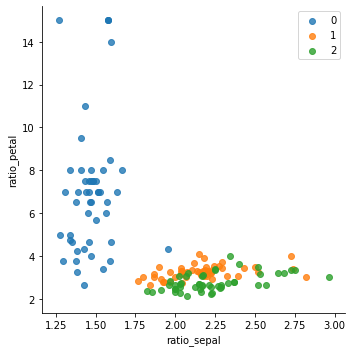

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
iris = df
iris["Id"] = iris.index
iris["ratio_sepal"] = iris["SepalLengthCm"]/iris["SepalWidthCm"]
iris["ratio_petal"] = iris["PetalLengthCm"]/iris["PetalWidthCm"]

# sns.lmplot(x="Id", y="ratio_sepal", data=iris, hue="Species", fit_reg=False, legend=False)

# plt.legend()
# plt.show()

sns.lmplot(x="ratio_sepal", y="ratio_petal", data=iris, hue="Species", fit_reg=False, legend=False)

plt.legend()
plt.show()

In [7]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 8),
                    max_iter=1000, 
                    verbose=True, 
                    learning_rate_init=0.001,
                    solver='adam',
                    alpha=0.0001,
                    activation='tanh')

In [8]:
mlp.fit(X_train,y_train)

/Users/nullphantom/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.74475101
Iteration 2, loss = 1.72227119
Iteration 3, loss = 1.70016751
Iteration 4, loss = 1.67845072
Iteration 5, loss = 1.65712944
Iteration 6, loss = 1.63621463
Iteration 7, loss = 1.61571685
Iteration 8, loss = 1.59564626
Iteration 9, loss = 1.57601204
Iteration 10, loss = 1.55682160
Iteration 11, loss = 1.53808057
Iteration 12, loss = 1.51979294
Iteration 13, loss = 1.50196110
Iteration 14, loss = 1.48458580
Iteration 15, loss = 1.46766601
Iteration 16, loss = 1.45119894
Iteration 17, loss = 1.43518006
Iteration 18, loss = 1.41960323
Iteration 19, loss = 1.40446081
Iteration 20, loss = 1.38974385
Iteration 21, loss = 1.37544217
Iteration 22, loss = 1.36154460
Iteration 23, loss = 1.34803903
Iteration 24, loss = 1.33491267
Iteration 25, loss = 1.32215210
Iteration 26, loss = 1.30974354
Iteration 27, loss = 1.29767292
Iteration 28, loss = 1.28592615
Iteration 29, loss = 1.27448917
Iteration 30, loss = 1.26334819
Iteration 31, loss = 1.25248977
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 8), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [9]:
predictions = mlp.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
cf = confusion_matrix(y_test,predictions)
print(cf)

[[16  0  0]
 [ 0  9  1]
 [ 0  0 12]]


In [10]:
akurasi = (cf[0][0] + cf[1][1] + cf[2][2]) / cf.sum()
akurasi

0.9736842105263158

In [11]:
# save model
from sklearn.externals import joblib
filename = 'iris_model.sav'
joblib.dump(mlp, filename)
print("model saved")

model saved


/Users/nullphantom/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
data = [5.5, 2.5, 5, 1.3] #????
# data = [3.2, 1.6, 1.4, 0.5] #setosa
# data = [5.1, 3.5, 1.4, 0.2] #setosa
# data = [5.9, 2.2, 4.0, 1.5] #versicolor
# data = [5.4, 2.2, 4.2, 1.2] #versicolor
# data = [6.0, 3.5, 5.4, 2.2] #virginica
# data = [5.8, 3.1, 5.0, 1.7] #virginica

In [13]:
prediction = mlp.predict([data])

In [14]:
print (prediction)

[2]
